In [1]:
# Loading and manipulation data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Models from sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [2]:
# Let load in our data
data= pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Let rename our ourtcome(predictions) to target
data["target"]= data["Outcome"]
data.drop("Outcome", inplace=True, axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Let check if we have missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
target                      0
dtype: int64

In [7]:
# Let check the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Let work with Pregnancies, age and probability of having diabetest

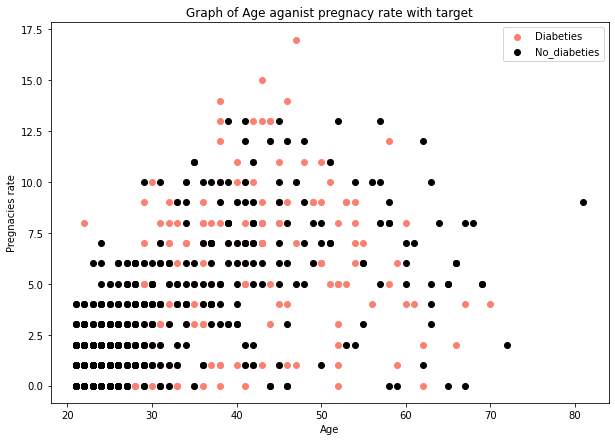

In [19]:
plt.figure(figsize=(10, 7))


plt.scatter(data.Age[data.target==1],
           data.Pregnancies[data.target==1],
           color="salmon")

# Let plot for where the lable is 0 (did not have diabetices)
plt.scatter(data.Age[data.target==0],
           data.Pregnancies[data.target==0],
           color="black")

# Let customized our plot
plt.legend(["Diabeties", "No_diabeties"])
plt.xlabel("Age")
plt.ylabel("Pregnacies rate")
plt.title("Graph of Age aganist pregnacy rate with target");

In [20]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
# Let check the correlation
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


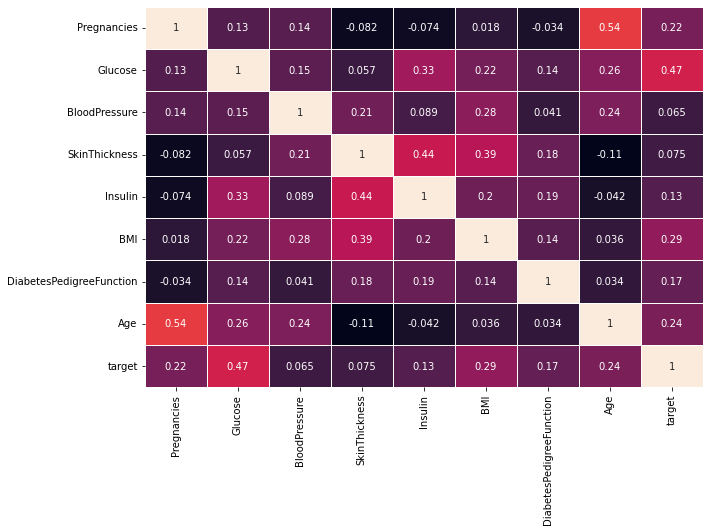

In [23]:
corr_max= data.corr()


fig, ax= plt.subplots(figsize= (10, 7))


ax= sns.heatmap(corr_max, 
               annot=True,
               linewidths=0.5,
               cbar=False)

In [26]:
data.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

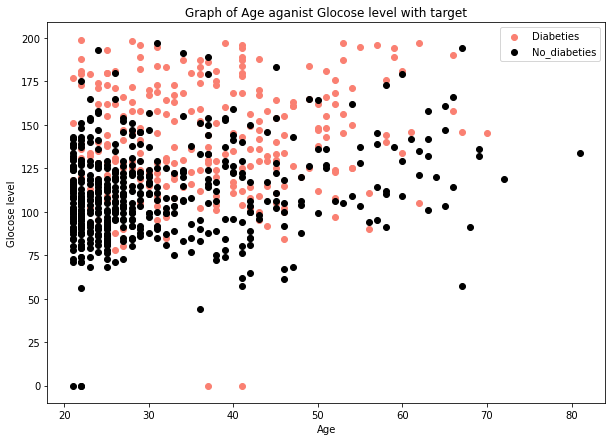

In [27]:
plt.figure(figsize=(10, 7))


plt.scatter(data.Age[data.target==1],
           data.Glucose[data.target==1],
           color="salmon")

# Let plot for where the lable is 0 (did not have diabetices)
plt.scatter(data.Age[data.target==0],
           data.Glucose[data.target==0],
           color="black")

# Let customized our plot
plt.legend(["Diabeties", "No_diabeties"])
plt.xlabel("Age")
plt.ylabel("Glocose level")
plt.title("Graph of Age aganist Glocose level with target");

### Spliting our data into feartures and lables

In [31]:
x= data.drop("target", axis=1)
y= data["target"]

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

In [34]:
x.shape

(768, 8)

In [35]:
y.shape

(768,)

### Splting our data into train and test

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [43]:
len(x_train), len(x_test), len(y_train), len(y_test)

(614, 154, 614, 154)

In [44]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
70,2,100,66,20,90,32.9,0.867,28
316,3,99,80,11,64,19.3,0.284,30
308,0,128,68,19,180,30.5,1.391,25
16,0,118,84,47,230,45.8,0.551,31
166,3,148,66,25,0,32.5,0.256,22
...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46
438,1,97,70,15,0,18.2,0.147,21
754,8,154,78,32,0,32.4,0.443,45
653,2,120,54,0,0,26.8,0.455,27


In [45]:
y_train

70     1
316    0
308    1
16     1
166    0
      ..
745    0
438    0
754    1
653    0
343    0
Name: target, Length: 614, dtype: int64

## Modelling

In [46]:
# Let set up a dictionary for all our model
models= {"RandomForestClassifier": RandomForestClassifier(),
         "GaussinNB": GaussianNB(),
         "LogisticRegression": LogisticRegression(solver='lbfgs', max_iter=1000),
         "KNeighbors": KNeighborsClassifier()

}

In [47]:
# Let create a funtion to fit and score our model

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    """
    Fit and score machine learning models
    
    Augs:

        models = a dict containing Sklearn classifier models
        x_train = the training data (no label)
        x_test= the test data (no label)
        y_train= train label
        y_test= test label
    
    Returns
        A the score of each model in the dict
    """
    
    # Set random seed 
    np.random.seed(42)
    # Make an emt dict to store our result
    models_scores= {}
    
    # Loop through the model
    for model_name, model in models.items(): 
        # let fit each model
        model.fit(x_train, y_train)
        # Let score each model and add it to our models_scores dict
        models_scores[model_name]= model.score(x_test, y_test)
        
    return models_scores

In [48]:
model_score= fit_and_score(models,
                          x_train,
                          x_test,
                          y_train,
                          y_test)

In [49]:
model_score

{'RandomForestClassifier': 0.7922077922077922,
 'GaussinNB': 0.7662337662337663,
 'LogisticRegression': 0.7987012987012987,
 'KNeighbors': 0.7077922077922078}

In [52]:
# Let convert our model score into a pandas DataFrame
model_score_df= pd.DataFrame(model_score, index=["Accuracy"])
model_score_df

,RandomForestClassifier,GaussinNB,LogisticRegression,KNeighbors
Accuracy,0.792208,0.766234,0.798701,0.707792


In [53]:
model_score_df.T

,Accuracy
RandomForestClassifier,0.792208
GaussinNB,0.766234
LogisticRegression,0.798701
KNeighbors,0.707792


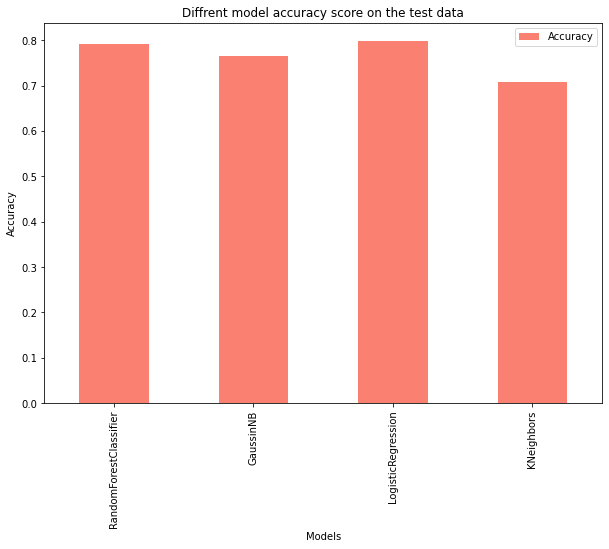

In [59]:
# Let plot our model score
model_score_df.T.plot(kind= "bar",
                     figsize=(10, 7),
                     color="salmon")

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Diffrent model accuracy score on the test data")
plt.savefig("Diffrent Models Accuracy")

From what we can see above,  we can see that our RandomForestClassifier and LogisticRegression outperform other models, let turn their hyperparamaters

### LogisticRegression Hyperparameter Tuning

logisticRegression has two hyperparameters that we can tune

1. C 
2. penalty 

In [60]:
# Let set uo our parameter
rg_log_re= {"C": np.logspace(-4, 4, 50),
            "penalty": ['l1', 'l2']}

In [61]:
# Let set random seed
np.random.seed(42)

# Let set up our model instant
model= LogisticRegression(solver='lbfgs', max_iter=1000)

rs_log_reg= RandomizedSearchCV(model,
                              param_distributions=rg_log_re,
                              n_iter=5,
                              cv=5,
                              verbose=True,
                              scoring="accuracy")

# Let fit our model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/olowu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    rai

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=True)

In [63]:
rs_log_reg.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=1000),
 'n_iter': 5,
 'n_jobs': None,
 'param_distributions': {'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
         4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
         2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
         9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
         4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
         1.84206997e-01, 2.68269580e-01

In [64]:
# Let check our best parameters
rs_log_reg.best_params_

{'penalty': 'l2', 'C': 0.3906939937054613}

In [66]:
# Let make evaluate our rs_log_reg

rs_log_reg.score(x_test, y_test)

0.7987012987012987

In [67]:
model_score

{'RandomForestClassifier': 0.7922077922077922,
 'GaussinNB': 0.7662337662337663,
 'LogisticRegression': 0.7987012987012987,
 'KNeighbors': 0.7077922077922078}

We can see that despite turning our hyperparameter,  we still have the same accuracy as when we did not

### Randomforest classifier hyperparameter turn

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [False]

In [70]:
# Create the grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
rf_clf_grid= RandomForestClassifier()


rf_grid= GridSearchCV(rf_clf_grid,
                     param_grid=grid,
                     scoring="accuracy",
                     verbose=True,
                     cv=5)

# Let fit our grid search model
rf_grid.fit(x_train, y_train)
rf_grid

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 175, 250, 325, 400]},
             scoring='accuracy', verbose=True)

In [72]:
# Let see our best parameter
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [73]:
# Let score our model
rf_grid.score(x_test, y_test)

0.7727272727272727

Well, we can see that our RandomForestRegressor outperform our RandomForestClassifire, let now save our model 

In [74]:
import pickle

In [77]:
pickle.dump(rs_log_reg, open("rf_forest_model_1.pkl", "wb"))

In [78]:
# Let loading our model  and make predictions
loaded_model=pickle.load(open("rf_forest_model_1.pkl", "rb"))
# rb read bianary
loaded_model.score(x_test, y_test)

0.7987012987012987

### Making predictions and evaluation our model

In [79]:
# let make prediction on our test data
y_preds= loaded_model.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [80]:
y_test

735    0
96     0
728    0
532    0
340    0
      ..
172    0
645    0
326    1
122    0
322    1
Name: target, Length: 154, dtype: int64

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [83]:
# Let plot a confusion metrics
conf_max= confusion_matrix(y_test,
                          y_preds)

conf_max


array([[96, 16],
       [15, 27]])

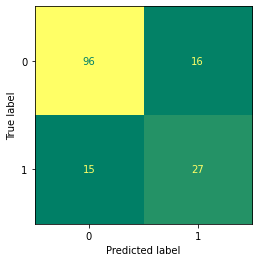

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                       y_preds,
                                       cmap="summer",
                                       colorbar=False);



### Make predictions

Well, we have did a great job, let start making predictions on our model

we will define a funtions to do so

In [90]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1


In [112]:
patient= (6, 148, 72, 35, 0, 33.6, 0.627, 50)

# Let turn our input in to numpy
numpy_input= np.asarray(patient)

numpy_input_reshaped= numpy_input.reshape(1, -1)
numpy_input_reshaped

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [114]:
loaded_model.predict(numpy_input_reshaped)

/home/olowu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

#### Let create a funtion to replecate this

In [116]:
data.head(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target


In [117]:
def make_prediction(input_data):
    """
    Take a patience input data whic includes the 
    1. Pregnancies
    2. Glucose level
    3. BloodPressure
    4. SkinThickness
    5. Insulin
    6. BMI
    7. DiabetesPedigreeFunction
    8. Age
    
    Returns:
       Prediction if a patient has diabetics or not

    """
    
    # Let convert our input into numpy array
    numpy_input= np.asarray(input_data)
    
    # Let reshape our input data to be a 2d array
    numpy_input_reshaped= numpy_input.reshape(1, -1)
    
    # Let make predtitions on our input
    
    prediction= loaded_model.predict(numpy_input_reshaped)
    print(prediction)
    
    if prediction[0] == 0:
        print("Congratulations, you are not having Diabetes")
    
    else:
        print("Sorry, you are diagnose of having Diabetes")
        print("Consider calling Dr. Dave for precription")
    
    

In [118]:
make_prediction(patient)

[1]
Sorry, you are diagnose of having Diabetes
Consider calling Dr. Dave for precription


/home/olowu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
